In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # Changed from LinearRegression as you're doing classification
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier # Changed from Regressors
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error, r2_score # Added classification metrics

In [2]:
# --- 1. Data Loading ---
try:
    df = pd.read_csv("../dataset/students.csv")
    print("Dataset loaded successfully from '../dataset/students.csv'.")
except FileNotFoundError:
    print("Error: 'students.csv' not found. Please ensure the file is in the correct directory.")
    exit() # Exit if the dataset isn't found

Dataset loaded successfully from '../dataset/students.csv'.


In [3]:
# --- 2. Data Exploration and Visualization ---
print("\n--- Initial Data Exploration ---")
print("DataFrame Head:")
df.head()


--- Initial Data Exploration ---
DataFrame Head:


,Student ID,Name,Age,Gender,Branch,Average GPA,Backlogs,Attendance (%),Clubs,Skills,...,CTC (LPA),Alumni Path,Sem1 GPA,Sem2 GPA,Sem3 GPA,Sem4 GPA,Sem5 GPA,Sem6 GPA,Sem7 GPA,Sem8 GPA
0,b37412a3-fa5c-40ca-b087-7109a47482d7,Amit,21.0,Male,MECH,6.99,0.0,70.45,"Literary Society, Robotics","C++, Machine Learning, Python, Java",...,0.00,NaN,8.34,5.24,6.06,7.81,7.18,7.04,8.26,5.99
1,65001423-faeb-4d19-a550-8ea26133a34d,Tina Ballard,19.0,Male,ECE,6.46,0.0,65.45,"Literary Society, Coding Club","C++, SQL, Web Development",...,0.00,NaN,7.37,6.37,6.45,5.99,6.55,6.99,6.46,5.52
2,228aaf1d-8710-4c8d-bfec-001b0df01f34,Meena,19.0,Female,CIVIL,7.08,0.0,84.79,Literary Society,"Data Science, SQL, Machine Learning",...,0.00,NaN,5.79,8.82,7.03,6.92,7.67,6.01,7.75,6.62
3,1aa67474-e200-4157-ad54-c95aaa4d52a8,Christopher Morales,23.0,Male,ECE,6.92,2.0,62.26,"Coding Club, Entrepreneurship Cell","Python, SQL, Java",...,5.89,Research,7.90,4.26,8.19,7.52,8.32,6.80,4.94,7.43
4,5122db4a-14c8-44d7-b2f4-e869f69d3dd7,Siddharth,20.0,Male,EEE,7.09,0.0,97.12,Robotics,"C++, SQL, Java, Python",...,0.00,NaN,6.86,6.24,7.64,7.15,5.91,6.18,8.19,8.54


In [4]:
print("\nDataFrame Info:")
df.info()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Student ID         1999 non-null   object 
 1   Name               2000 non-null   object 
 2   Age                1999 non-null   float64
 3   Gender             1999 non-null   object 
 4   Branch             1999 non-null   object 
 5   Average GPA        1999 non-null   float64
 6   Backlogs           1999 non-null   float64
 7   Attendance (%)     1999 non-null   float64
 8   Clubs              1999 non-null   object 
 9   Skills             1999 non-null   object 
 10  Internship Done    1999 non-null   object 
 11  Internship Domain  982 non-null    object 
 12  Placement Status   1999 non-null   object 
 13  Placement Domain   1032 non-null   object 
 14  CTC (LPA)          1999 non-null   float64
 15  Alumni Path        1032 non-null   object 
 16  Sem1 GP

In [5]:
print(f"\nDataFrame Shape: {df.shape}")


DataFrame Shape: (2000, 24)


In [6]:
print("\nMissing Values Before Cleaning:")
df.isnull().sum()


Missing Values Before Cleaning:


Student ID              1
Name                    0
Age                     1
Gender                  1
Branch                  1
Average GPA             1
Backlogs                1
Attendance (%)          1
Clubs                   1
Skills                  1
Internship Done         1
Internship Domain    1018
Placement Status        1
Placement Domain      968
CTC (LPA)               1
Alumni Path           968
Sem1 GPA                1
Sem2 GPA                1
Sem3 GPA                1
Sem4 GPA                1
Sem5 GPA                1
Sem6 GPA                1
Sem7 GPA                1
Sem8 GPA                1
dtype: int64

In [7]:
print("\nCategorical Columns:", df.select_dtypes(include='object').columns.tolist())


Categorical Columns: ['Student ID', 'Name', 'Gender', 'Branch', 'Clubs', 'Skills', 'Internship Done', 'Internship Domain', 'Placement Status', 'Placement Domain', 'Alumni Path']


In [8]:
print("Numerical Columns:", df.select_dtypes(include='number').columns.tolist())


Numerical Columns: ['Age', 'Average GPA', 'Backlogs', 'Attendance (%)', 'CTC (LPA)', 'Sem1 GPA', 'Sem2 GPA', 'Sem3 GPA', 'Sem4 GPA', 'Sem5 GPA', 'Sem6 GPA', 'Sem7 GPA', 'Sem8 GPA']


In [9]:
# Calculate Total GPA and add to DataFrame
# This calculation needs to happen BEFORE dropping individual Sem GPA columns
sem_gpa_cols = ['Sem1 GPA', 'Sem2 GPA', 'Sem3 GPA', 'Sem4 GPA',
                'Sem5 GPA', 'Sem6 GPA', 'Sem7 GPA', 'Sem8 GPA']

# Ensure all Sem GPA columns exist before calculating mean
if all(col in df.columns for col in sem_gpa_cols):
    df['Total_GPA'] = df[sem_gpa_cols].mean(axis=1)
    print("\n'Total_GPA' calculated and added to DataFrame.")
else:
    print("\nWarning: Some 'Sem GPA' columns missing. 'Total_GPA' might be incomplete or inaccurate.")
    # If Total_GPA is critical and Sem GPAs are missing, you might want to handle this differently.
    # For now, we'll proceed assuming it's okay or Total_GPA will be imputed if missing later.


'Total_GPA' calculated and added to DataFrame.



--- Data Visualizations ---


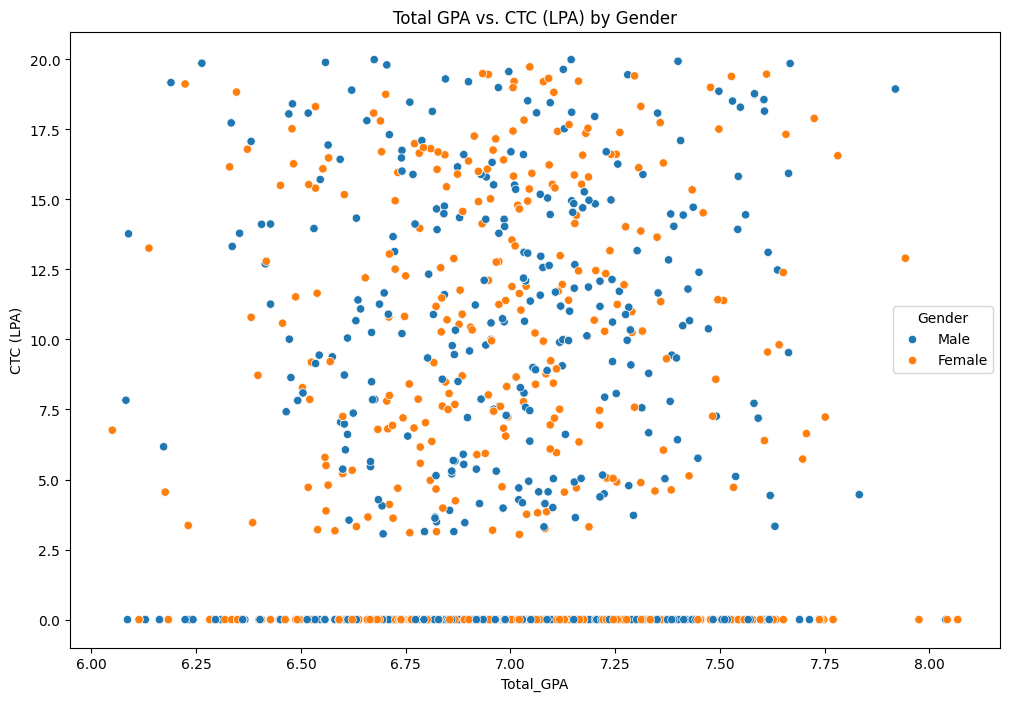

In [10]:
# Visualizations
print("\n--- Data Visualizations ---")
plt.figure(figsize=(12,8))
sns.scatterplot(x='Total_GPA', y='CTC (LPA)', data=df, hue='Gender') # Use 'Total_GPA' column
plt.title("Total GPA vs. CTC (LPA) by Gender")
plt.show()

C:\Users\jaina\AppData\Local\Temp\ipykernel_21248\1373350087.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Backlogs', y='StudentCount', data=backlog_df, palette='viridis')


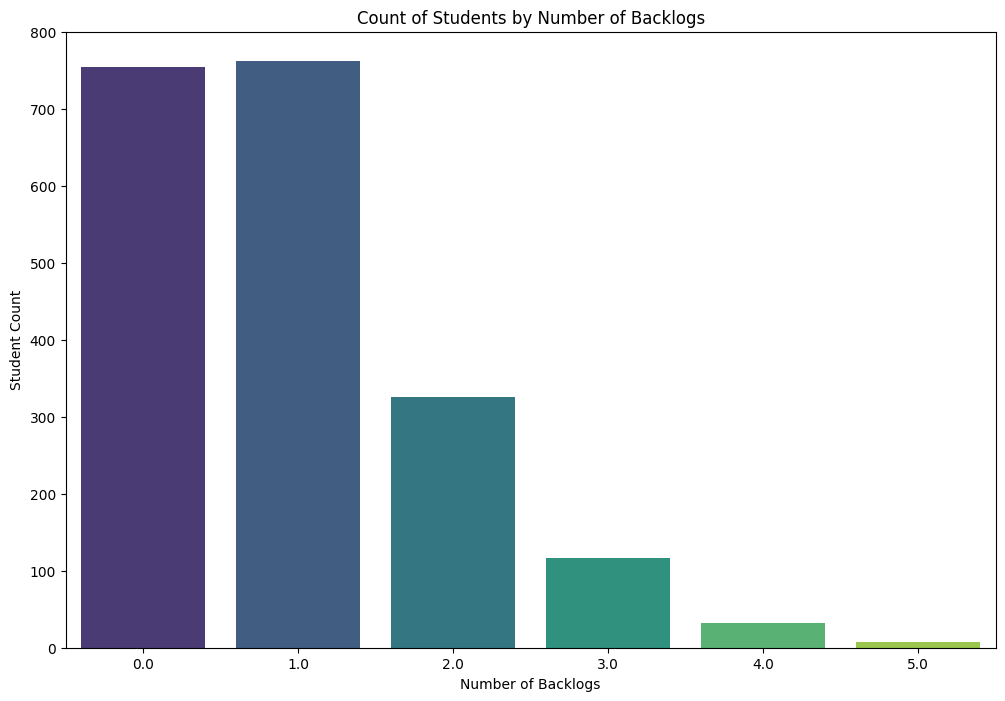

In [11]:
backlog_student_count = df['Backlogs'].value_counts()
backlog_df = backlog_student_count.reset_index()
backlog_df.columns = ['Backlogs', 'StudentCount']
plt.figure(figsize=(12, 8))
sns.barplot(x='Backlogs', y='StudentCount', data=backlog_df, palette='viridis')
plt.title('Count of Students by Number of Backlogs')
plt.xlabel('Number of Backlogs')
plt.ylabel('Student Count')
plt.show()

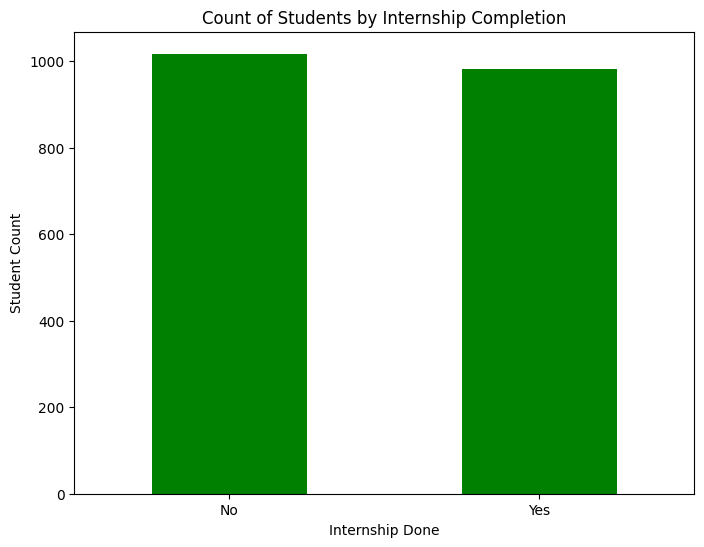

In [12]:
plt.figure(figsize=(8, 6))
df['Internship Done'].value_counts().plot(kind='bar', color='green')
plt.title('Count of Students by Internship Completion')
plt.xlabel('Internship Done')
plt.ylabel('Student Count')
plt.xticks(rotation=0)
plt.show()

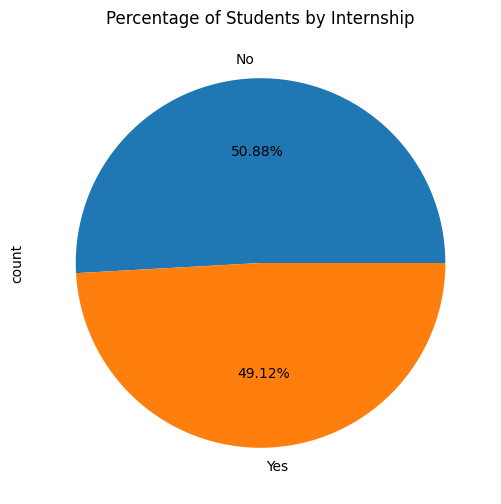

In [13]:
plt.figure(figsize=(8, 6))
df['Internship Done'].value_counts().plot(kind='pie', autopct='%.2f%%') # Fixed typo: '1%.2f%%' to '%.2f%%'
plt.title('Percentage of Students by Internship')
plt.show()

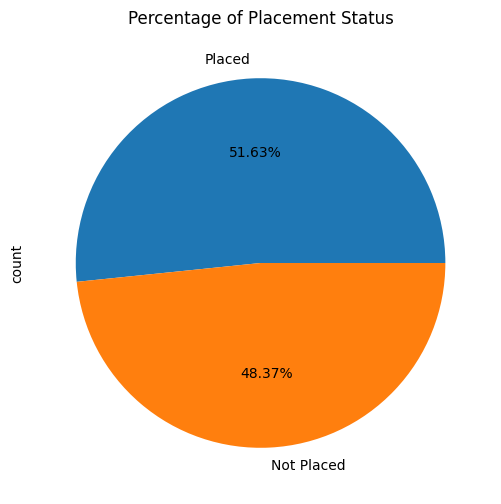

In [14]:
plt.figure(figsize=(8, 6))
df['Placement Status'].value_counts().plot(kind='pie', autopct='%.2f%%') # Fixed typo
plt.title('Percentage of Placement Status')
plt.show()

C:\Users\jaina\AppData\Local\Temp\ipykernel_21248\763981842.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Placement Status', y='Total_GPA', data=df, palette='Set2') # Use 'Total_GPA'


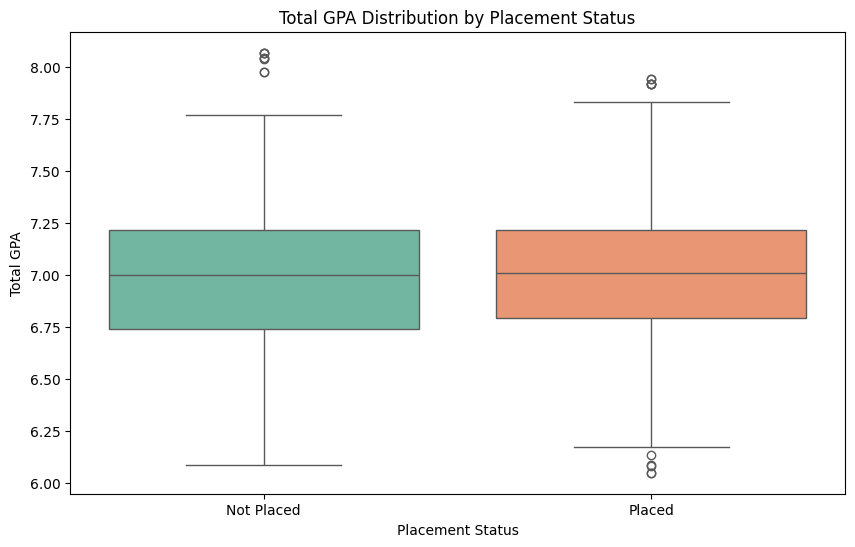

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Placement Status', y='Total_GPA', data=df, palette='Set2') # Use 'Total_GPA'
plt.title('Total GPA Distribution by Placement Status')
plt.xlabel('Placement Status')
plt.ylabel('Total GPA')
plt.show()

C:\Users\jaina\AppData\Local\Temp\ipykernel_21248\835466511.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Internship Domain', y='count', data=intern_df, palette='viridis')


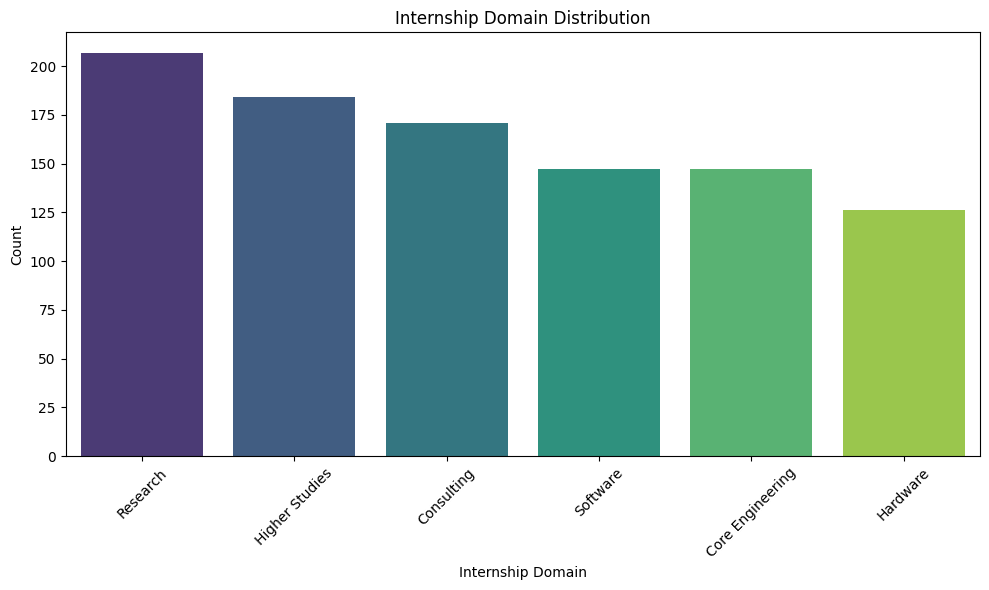

In [16]:
intern = df['Internship Domain'].value_counts()
intern_df = intern.reset_index()
intern_df.columns = ['Internship Domain', 'count']
plt.figure(figsize=(10, 6))
sns.barplot(x='Internship Domain', y='count', data=intern_df, palette='viridis')
plt.title('Internship Domain Distribution')
plt.xlabel('Internship Domain')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
# --- 3. Data Cleaning and Feature Engineering ---
print("\n--- Data Cleaning and Feature Engineering ---")

# Drop the identified unnecessary columns
columns_to_drop_final = ['Student ID', 'Name', 'Clubs', 'Skills', 'Average GPA'] + sem_gpa_cols
existing_cols_to_drop_final = [col for col in columns_to_drop_final if col in df.columns]
df.drop(columns=existing_cols_to_drop_final, axis=1, inplace=True)
print("Unnecessary columns dropped.")
print("DataFrame Head after column drops:")
print(df.head())


--- Data Cleaning and Feature Engineering ---
Unnecessary columns dropped.
DataFrame Head after column drops:
    Age  Gender Branch  Backlogs  Attendance (%) Internship Done  \
0  21.0    Male   MECH       0.0           70.45             Yes   
1  19.0    Male    ECE       0.0           65.45              No   
2  19.0  Female  CIVIL       0.0           84.79             Yes   
3  23.0    Male    ECE       2.0           62.26              No   
4  20.0    Male    EEE       0.0           97.12             Yes   

  Internship Domain Placement Status  Placement Domain  CTC (LPA) Alumni Path  \
0        Consulting       Not Placed               NaN       0.00         NaN   
1               NaN       Not Placed               NaN       0.00         NaN   
2          Research       Not Placed               NaN       0.00         NaN   
3               NaN           Placed  Core Engineering       5.89    Research   
4    Higher Studies       Not Placed               NaN       0.00         N

In [18]:
# Handle missing numerical values (columns with exactly one missing value)
# This finds the column with the single max null and drops that row.
numerical_cols_with_single_null = df.select_dtypes(include='number').isnull().sum()
# Filter for columns that actually have exactly 1 missing value
cols_with_one_nan = numerical_cols_with_single_null[numerical_cols_with_single_null == 1].index.tolist()

if cols_with_one_nan:
    # Dropping rows where any of these columns have a NaN
    df.dropna(subset=cols_with_one_nan, inplace=True)
    print(f"Dropped rows with single missing numerical values in: {cols_with_one_nan}")

Dropped rows with single missing numerical values in: ['Age', 'Backlogs', 'Attendance (%)', 'CTC (LPA)', 'Total_GPA']


In [19]:
# Impute remaining categorical columns with mode or drop if single NaN
cats_to_process = df.select_dtypes(include='object').columns

# Initialize LabelEncoders for specific columns *before* imputation if needed for mapping
le_gender = LabelEncoder()
le_placement_status = LabelEncoder()
placement_status_mapping = {}

In [20]:
for col in cats_to_process:
    missing_count = df[col].isnull().sum()
    if missing_count == 1:
        # Drop row for single missing categorical value
        df.dropna(subset=[col], inplace=True)
        print(f"Dropped row with single missing value in categorical column: {col}")
    elif missing_count > 1:
        # Impute with most frequent for columns with many missing values
        imputer = SimpleImputer(strategy='most_frequent')
        df[col] = imputer.fit_transform(df[[col]]).ravel()
        print(f"Imputed missing values in '{col}' with most frequent.")

Imputed missing values in 'Internship Domain' with most frequent.
Imputed missing values in 'Placement Domain' with most frequent.
Imputed missing values in 'Alumni Path' with most frequent.


In [21]:
# Apply Label Encoding after imputation (if any, to ensure no NaNs)
if 'Gender' in df.columns:
    df['Gender'] = le_gender.fit_transform(df['Gender'])
    print("Gender column label encoded.")

if 'Placement Status' in df.columns:
    df['Placement Status'] = le_placement_status.fit_transform(df['Placement Status'])
    # Store the mapping from numerical labels back to original strings for interpretation
    placement_status_mapping = {idx: label for idx, label in enumerate(le_placement_status.classes_)}
    print("Placement Status column label encoded and mapping stored.")

Gender column label encoded.
Placement Status column label encoded and mapping stored.


In [22]:
print("\nDataFrame Head after initial cleaning and encoding:")
print(df.head())
print("\nMissing Values After Cleaning:")
print(df.isnull().sum()) # Should show 0 for numerical and imputed categorical


DataFrame Head after initial cleaning and encoding:
    Age  Gender Branch  Backlogs  Attendance (%) Internship Done  \
0  21.0       1   MECH       0.0           70.45             Yes   
1  19.0       1    ECE       0.0           65.45              No   
2  19.0       0  CIVIL       0.0           84.79             Yes   
3  23.0       1    ECE       2.0           62.26              No   
4  20.0       1    EEE       0.0           97.12             Yes   

  Internship Domain  Placement Status  Placement Domain  CTC (LPA)  \
0        Consulting                 0  Core Engineering       0.00   
1          Research                 0  Core Engineering       0.00   
2          Research                 0  Core Engineering       0.00   
3          Research                 1  Core Engineering       5.89   
4    Higher Studies                 0  Core Engineering       0.00   

  Alumni Path  Total_GPA  
0    Research    6.99000  
1    Research    6.46250  
2    Research    7.07625  
3    Rese

In [23]:
# --- 4. Separate Features (X) and Target (y) ---
# Ensure 'Placement Status' is numerical (0/1) at this point
if 'Placement Status' in df.columns:
    X = df.drop('Placement Status', axis=1) # Features
    y = df['Placement Status']             # Target
    print("\nFeatures (X) and Target (y) separated.")
else:
    print("Error: 'Placement Status' column not found after preprocessing. Cannot define X and y.")
    exit()


Features (X) and Target (y) separated.


In [24]:
# --- 5. One-Hot Encoding for remaining categorical features in X ---
# This step needs to happen AFTER X and y are separated and before train_test_split.
# Identify remaining object columns in X (e.g., Branch, Internship Done, etc.)
cols_to_onehot = X.select_dtypes(include='object').columns

if not cols_to_onehot.empty:
    for col in cols_to_onehot:
        dummies = pd.get_dummies(X[col], prefix=col, drop_first=True).astype(int)
        X = X.drop(columns=[col]).join(dummies)
    print(f"Remaining categorical features in X ({cols_to_onehot.tolist()}) one-hot encoded.")
else:
    print("No additional categorical columns in X to one-hot encode.")

Remaining categorical features in X (['Branch', 'Internship Done', 'Internship Domain', 'Placement Domain', 'Alumni Path']) one-hot encoded.


In [25]:
# --- 6. Define original_X_columns ---
# This list now contains ALL the column names that will go into the model,
# including the one-hot encoded dummy variables. This is CRUCIAL for prediction.
original_X_columns = X.columns.tolist()
print(f"Original X columns for model input (total {len(original_X_columns)}):")
print(f"First 5: {original_X_columns[:5]}")
print(f"Last 5: {original_X_columns[-5:]}")

Original X columns for model input (total 25):
First 5: ['Age', 'Gender', 'Backlogs', 'Attendance (%)', 'CTC (LPA)']
Last 5: ['Placement Domain_Research', 'Placement Domain_Software', 'Alumni Path_Job', 'Alumni Path_Research', 'Alumni Path_Startup']


In [26]:
# --- 7. Split Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("\nData split into training and testing sets.")

# --- 8. Feature Scaling ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Data split into training and testing sets.


In [27]:
# Convert scaled arrays back to DataFrames, preserving column names.
X_train_sc = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_sc = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)
print("Features scaled (X_train_sc, X_test_sc created).")


# --- 9. Model Training and Evaluation ---
print("\n--- Model Training and Evaluation ---")
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000), # Increased max_iter for convergence
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

Features scaled (X_train_sc, X_test_sc created).

--- Model Training and Evaluation ---


In [28]:
accuracy_scores = {}
rf_classifier = None # Initialize rf_classifier to capture the trained model

for name, model in models.items():
    print(f"\n--- Training {name} ---")
    model.fit(X_train_sc, y_train)

    y_pred = model.predict(X_test_sc)

    acc = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 60)

    # Capture the trained Random Forest model for later prediction
    if name == 'Random Forest':
        rf_classifier = model


--- Training Logistic Regression ---
Logistic Regression Accuracy: 0.9975

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       193
           1       1.00      1.00      1.00       207

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

------------------------------------------------------------

--- Training Decision Tree ---
Decision Tree Accuracy: 1.0000

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       193
           1       1.00      1.00      1.00       207

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

------------------------------------------------------------

---

In [29]:
print("\n--- All Model Accuracies ---")
for name, acc in accuracy_scores.items():
    print(f"{name}: {acc:.4f}")

if rf_classifier is None:
    print("\nError: Random Forest Classifier was not successfully trained and captured.")
else:
    print("\nRandom Forest Classifier (rf_classifier) is now ready for predictions.")


--- All Model Accuracies ---
Logistic Regression: 0.9975
Decision Tree: 1.0000
Random Forest: 1.0000

Random Forest Classifier (rf_classifier) is now ready for predictions.


In [30]:
# --- 10. Predict for a Custom Student Input ---
print("\n--- Initiating Prediction for a Custom Student Input ---")

# --- Define Hardcoded User Input Values ---
# Numerical inputs
age = 20.0
backlogs = 0.0
attendance = 100.0
total_gpa = 8.87

# Categorical inputs (these should be raw strings, matching your original data categories)
gender = "Female"
branch = "CSE"
internship_done = "No"
internship_domain = "Software Development" # Example: 'Consulting', 'Research', 'Higher Studies', 'Software Development', 'Marketing'
placement_domain = "IT/Software" # Example: 'Core Engineering', 'IT/Software', 'Finance', 'Data Science', 'Product Management', 'Startup', 'Others'
alumni_path = "Academia" # Example: 'Research', 'Entrepreneurship', 'Industry', 'Academia', 'Startup', 'Government'

# --- Preprocess User Input into a DataFrame ---
# Create an initial dictionary with all original features as keys, initializing all one-hot encoded parts to 0.
user_input_dict = {col: 0 for col in original_X_columns}

# Populate numerical features
user_input_dict['Age'] = age
user_input_dict['Backlogs'] = backlogs
user_input_dict['Attendance (%)'] = attendance
user_input_dict['Total_GPA'] = total_gpa
# If 'CTC (LPA)' was a feature:
# user_input_dict['CTC (LPA)'] = ctc_lpa


# Handle Gender (LabelEncoder)
# Use the actual fitted encoder (le_gender) for robustness
try:
    user_input_dict['Gender'] = le_gender.transform([gender])[0]
except ValueError:
    print(f"Warning: Gender '{gender}' not seen during training. Defaulting to 0 for Gender.")
    user_input_dict['Gender'] = 0 # Fallback if gender is an unseen category


# Handle One-Hot Encoded Categorical features
# Check if the generated column name exists in the original features.
# This is crucial for handling new/unknown categories gracefully.

# Branch
branch_col_name = f'Branch_{branch}'
if branch_col_name in user_input_dict:
    user_input_dict[branch_col_name] = 1
else:
    print(f"Warning: Branch '{branch}' not found in training categories. Setting corresponding dummy to 0.")

# Internship Done
internship_done_col_name = f'Internship Done_{internship_done}'
if internship_done_col_name in user_input_dict:
    user_input_dict[internship_done_col_name] = 1
else:
    print(f"Warning: Internship Done '{internship_done}' not found in training categories. Setting corresponding dummy to 0.")

# Internship Domain
internship_domain_col_name = f'Internship Domain_{internship_domain}'
if internship_domain_col_name in user_input_dict:
    user_input_dict[internship_domain_col_name] = 1
else:
    print(f"Warning: Internship Domain '{internship_domain}' not found in training categories. Setting corresponding dummy to 0.")

# Placement Domain
placement_domain_col_name = f'Placement Domain_{placement_domain}'
if placement_domain_col_name in user_input_dict:
    user_input_dict[placement_domain_col_name] = 1
else:
    print(f"Warning: Placement Domain '{placement_domain}' not found in training categories. Setting corresponding dummy to 0.")

# Alumni Path
alumni_path_col_name = f'Alumni Path_{alumni_path}'
if alumni_path_col_name in user_input_dict:
    user_input_dict[alumni_path_col_name] = 1
else:
    print(f"Warning: Alumni Path '{alumni_path}' not found in training categories. Setting corresponding dummy to 0.")

# Create a DataFrame from the dictionary.
# It's vital that the columns are in the EXACT SAME ORDER as original_X_columns.
custom_input_df = pd.DataFrame([user_input_dict])
custom_input_df = custom_input_df[original_X_columns] # Reorder columns to match training data


# --- Scale the Custom Input ---
# Use the *already fitted* scaler to transform the single input row.
custom_input_scaled = scaler.transform(custom_input_df)


# --- Make Prediction ---
prediction_numeric = rf_classifier.predict(custom_input_scaled)[0] # Get the 0 or 1
prediction_proba = rf_classifier.predict_proba(custom_input_scaled)[0] # Get probabilities


# --- Interpret Prediction ---
# Use the stored mapping to get the human-readable status
predicted_status = placement_status_mapping[prediction_numeric]

print(f"\n--- Prediction Results for Custom Input ---")
print(f"Based on the provided details, the student is predicted to be: **{predicted_status}**")
# Display probabilities for both classes based on the mapping
print(f"Probability '{placement_status_mapping[0]}': {prediction_proba[0]:.2f}")
print(f"Probability '{placement_status_mapping[1]}': {prediction_proba[1]:.2f}")


# Final message based on prediction
if predicted_status == 'Placed':
    print("\nGreat news! The model suggests a high chance of placement.")
else:
    print("\nThe model suggests it might be challenging to get placed. Consider improving relevant skills or areas.")




--- Initiating Prediction for a Custom Student Input ---

--- Prediction Results for Custom Input ---
Based on the provided details, the student is predicted to be: **Placed**
Probability 'Not Placed': 0.44
Probability 'Placed': 0.56

Great news! The model suggests a high chance of placement.


d:\Coding arena\python_codes\journey\jvenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
d:\Coding arena\python_codes\journey\jvenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
